In [41]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nb

## Behavioural data - CDS subscale  x metacognition in patients

In [91]:
mri_sample = pd.read_csv("mri_sample_stats.tsv", sep="\t", index_col=0)
regressors = mri_sample[["age", "group", "mean_fd", "CDS_State"]]
for c in ["control", "patient"]:
    regressors[c] = 0
    regressors[c][regressors.group == c] = 1
regressors.group = 1
z_convert = ["age", "mean_fd", "CDS_State"]
regressors[z_convert] -= regressors[z_convert].mean()
regressors[z_convert] /= regressors[z_convert] .std(ddof=0)
regressors.to_csv("mri_regressors.tsv", sep="\t")

/home/hw1012/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/hw1012/.pyenv/versions/3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [70]:
stats = pd.read_csv("full_sample_stats.tsv", sep="\t", index_col=0)
mri_sample = pd.read_csv("mri_sample_stats.tsv", sep="\t", index_col=0)

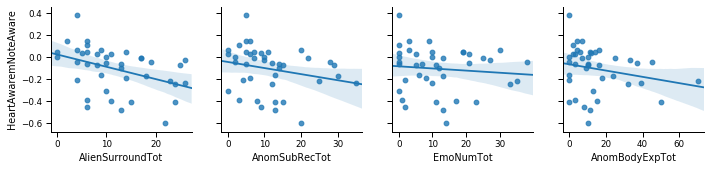

In [72]:
sns.set_context("paper")
sns.pairplot(stats, 
             x_vars=["AlienSurroundTot", "AnomSubRecTot", "EmoNumTot", "AnomBodyExpTot"], 
             y_vars=["HeartAwaremNoteAware"],
             kind="reg")

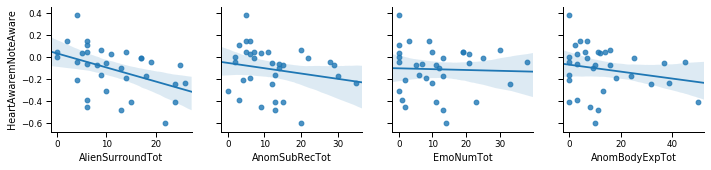

In [73]:
sns.set_context("paper")
sns.pairplot(mri_sample, 
             x_vars=["AlienSurroundTot", "AnomSubRecTot", "EmoNumTot", "AnomBodyExpTot"], 
             y_vars=["HeartAwaremNoteAware"],
             kind="reg")

## Task maps

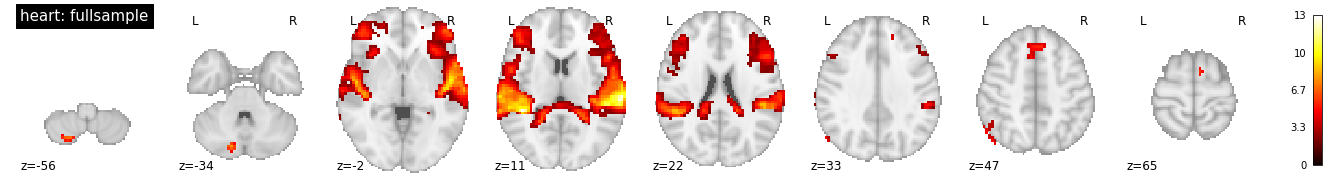

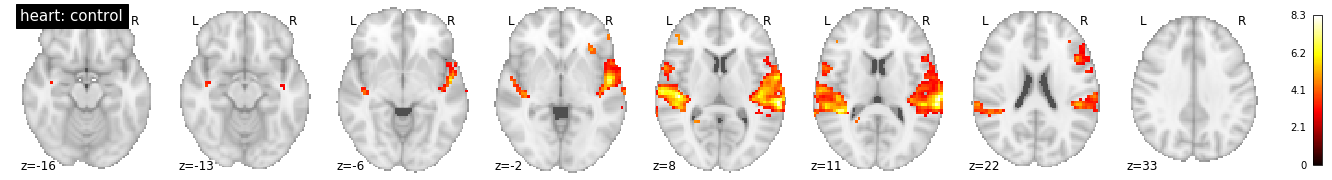

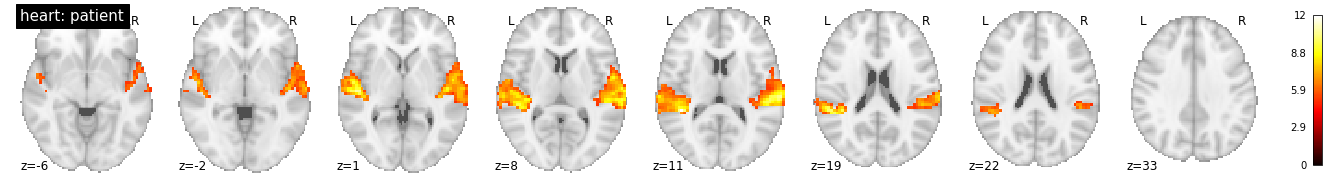

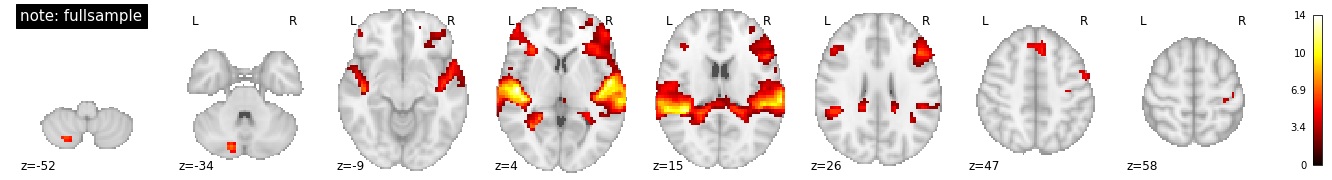

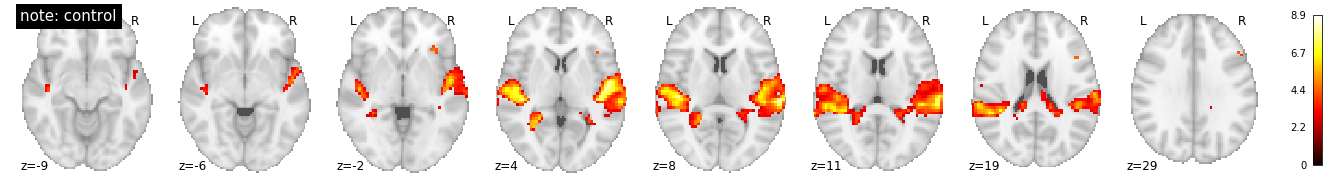

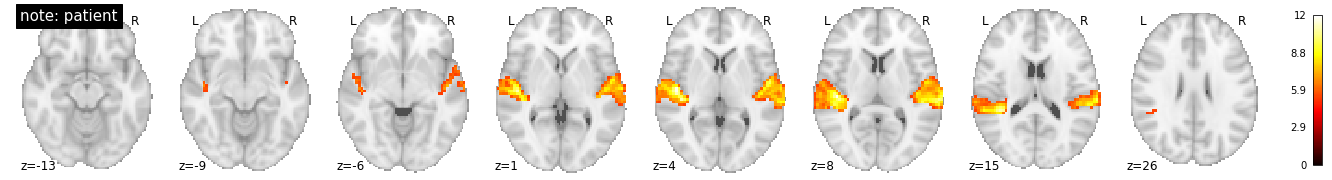

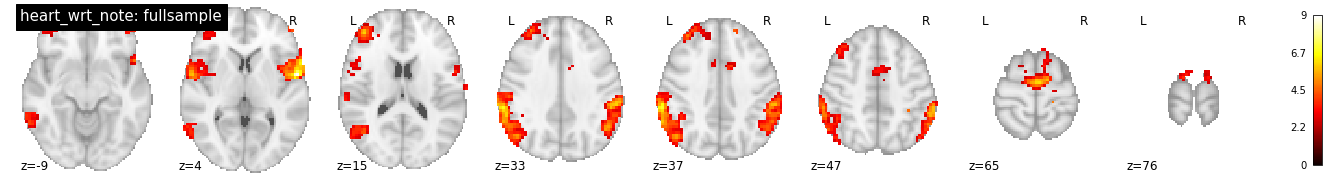

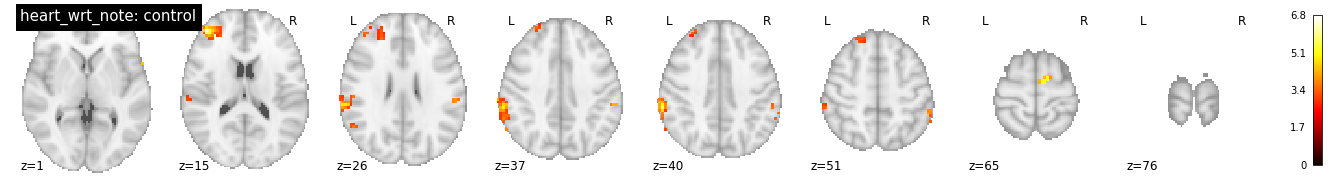

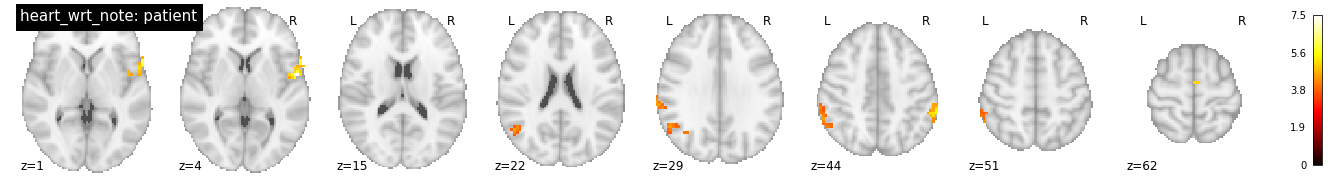

In [11]:
p = 0.05
for c in ["heart", "note", "heart_wrt_note"]:
    for g in ["fullsample", "control", "patient"]:
        tstat = f"glm_niftis/FSL_task/contrast_{c}/{g}_randomise_tstat.nii.gz"
        tfce = f"glm_niftis/FSL_task/contrast_{c}/{g}_randomise_tfce_corrp_tstat.nii.gz"
        title = ": ".join([c, g])        

        tfce_nii = nb.load(tfce)
        mask = tfce_nii.get_fdata() > (1 - p)
        sig = tfce_nii.get_fdata().max()
        vmax = nb.load(tstat).get_fdata().max()
        sig_tstat = nb.Nifti1Image(nb.load(tstat).get_fdata() * mask, 
                                   header=tfce_nii.header, 
                                   affine=tfce_nii.affine)
        fig = plotting.plot_stat_map(sig_tstat, vmax=vmax, title=title, 
                                     display_mode="z", cut_coords=8, draw_cross=False)

## PPI

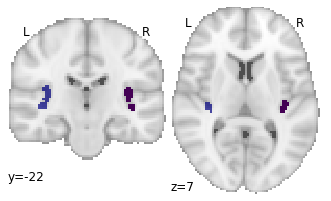

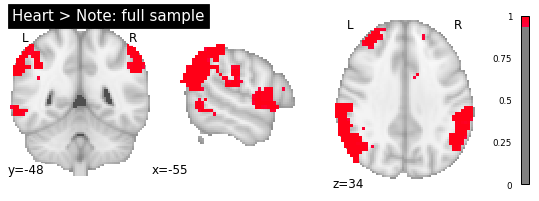

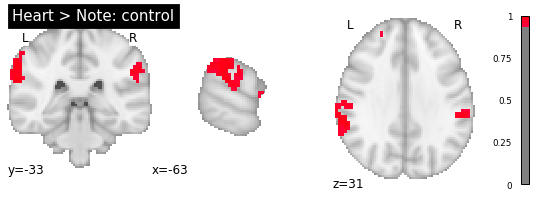

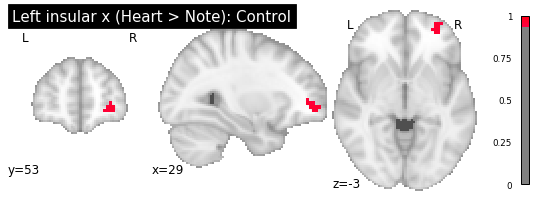

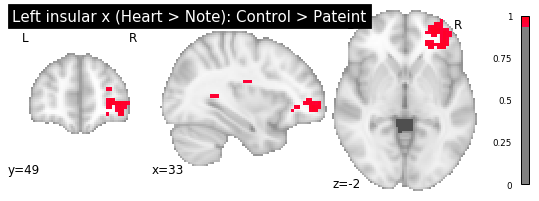

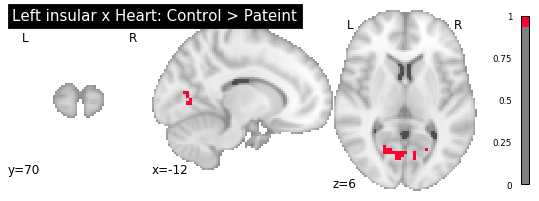

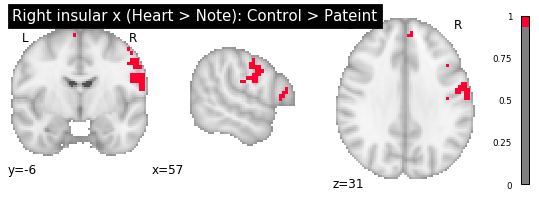

In [45]:
def sig_map(s_name, c_name, g_name, coord, title):
    p = 0.05
    tfce = f"./glm_niftis/FSL_PPI/{s_name}/contrast_{c_name}/{g_name}_tfce_corrp_tstat1.nii.gz"

    plotting.plot_stat_map(tfce, title=title, cmap="hsv", cut_coords=coord, 
                           vmax=1, threshold=0.949, draw_cross=False)
roi = plotting.plot_roi("../references/insular_masks/juelich_GM_insular_prob90_L.nii.gz",
                        display_mode="yz",
                        draw_cross=False)
roi.add_overlay("../references/insular_masks/juelich_GM_insular_prob90_R.nii.gz")

sig_map("insularL", "seed_int_Heart_wrt_Note", 
        "control", (29, 53, -3), "Left insular x (Heart > Note): Control")
sig_map("insularL", "seed_int_Heart_wrt_Note", 
        "control_wrt_patient", (33, 49, -2), "Left insular x (Heart > Note): Control > Pateint")
sig_map("insularL", "seed_int_Heart", 
        "control_wrt_patient", (-12, 70, 6), "Left insular x Heart: Control > Pateint")
sig_map("insularR", "seed_int_Heart_wrt_Note", 
        "control_wrt_patient", (57, -6, 31), "Right insular x (Heart > Note): Control > Pateint")

## cope value x continutous HRV